In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

import warnings
warnings.filterwarnings('ignore')

In [3]:
def read_xlsxfile(tahun):
    data = pd.read_excel(f"TA april/{tahun}.xlsx").T
    column = data.iloc[1]
    new_data = data.iloc[2:]
    new_data.columns = column
    
    return new_data['Daging Ayam']
    

In [4]:
directory = "TA april"
i=0

for path in glob.iglob(f'{directory}/*.xlsx'):
    print(path)
    data = pd.read_excel(path).T
    column = data.iloc[1]
    new_data = data.iloc[2:]
    new_data.columns = column
    data_daging = new_data['Daging Ayam']
    
    if i == 0:
        joined_data = data_daging.copy()
        
    else:
        joined_data = pd.concat([joined_data,
                                 data_daging]
                                , axis=0)
    
    i+=1
    

TA april\2020-1.xlsx
TA april\2020-2.xlsx
TA april\2020-3.xlsx
TA april\2020-4.xlsx
TA april\2020-5.xlsx
TA april\2020-6.xlsx
TA april\2020-7.xlsx
TA april\2020-8.xlsx
TA april\2020-9.xlsx
TA april\2020-91.xlsx
TA april\2020-92.xlsx
TA april\2020-93.xlsx
TA april\2021-1.xlsx
TA april\2021-2.xlsx
TA april\2022-1.xlsx
TA april\2022-2.xlsx
TA april\2023.xlsx


In [5]:
joined_data

01/ 01/ 2020         -
02/ 01/ 2020    34,300
03/ 01/ 2020    33,900
06/ 01/ 2020    33,250
07/ 01/ 2020    32,900
                 ...  
17/ 07/ 2023    38,750
18/ 07/ 2023    38,800
19/ 07/ 2023    39,600
20/ 07/ 2023    38,250
21/ 07/ 2023    38,350
Name: Daging Ayam, Length: 928, dtype: object

In [6]:
joined_data_df = pd.DataFrame(joined_data)
joined_data_df.reset_index(inplace=True)
joined_data_df

,index,Daging Ayam
0,01/ 01/ 2020,-
1,02/ 01/ 2020,"34,300"
2,03/ 01/ 2020,"33,900"
3,06/ 01/ 2020,"33,250"
4,07/ 01/ 2020,"32,900"
...,...,...
923,17/ 07/ 2023,"38,750"
924,18/ 07/ 2023,"38,800"
925,19/ 07/ 2023,"39,600"
926,20/ 07/ 2023,"38,250"


In [7]:
joined_data_df['index'] = pd.to_datetime(joined_data_df['index'], dayfirst=True)
joined_data_df


,index,Daging Ayam
0,2020-01-01,-
1,2020-01-02,"34,300"
2,2020-01-03,"33,900"
3,2020-01-06,"33,250"
4,2020-01-07,"32,900"
...,...,...
923,2023-07-17,"38,750"
924,2023-07-18,"38,800"
925,2023-07-19,"39,600"
926,2023-07-20,"38,250"


In [8]:
start_date = '01/01/2020'
end_date = '21/07/2023'

# Create a range of dates
dates = pd.date_range(start=start_date, end=end_date, freq='D')
dummy_data = pd.DataFrame({'': dates, 'Value': range(len(dates))})
dummy_data.rename(columns={'': 'index'}, inplace=True)
dummy_data


,index,Value
0,2020-01-01,0
1,2020-01-02,1
2,2020-01-03,2
3,2020-01-04,3
4,2020-01-05,4
...,...,...
1293,2023-07-17,1293
1294,2023-07-18,1294
1295,2023-07-19,1295
1296,2023-07-20,1296


In [9]:
merged_data = pd.merge(dummy_data, joined_data_df, on='index', how='outer')
merged_data.head()

,index,Value,Daging Ayam
0,2020-01-01,0,-
1,2020-01-02,1,"34,300"
2,2020-01-03,2,"33,900"
3,2020-01-04,3,NaN
4,2020-01-05,4,NaN


In [10]:
merged_data.replace('-', np.nan, inplace=True)
merged_data.head()

,index,Value,Daging Ayam
0,2020-01-01,0,NaN
1,2020-01-02,1,"34,300"
2,2020-01-03,2,"33,900"
3,2020-01-04,3,NaN
4,2020-01-05,4,NaN


In [11]:
merged_data.drop('Value',axis=1, inplace=True)
merged_data

,index,Daging Ayam
0,2020-01-01,NaN
1,2020-01-02,"34,300"
2,2020-01-03,"33,900"
3,2020-01-04,NaN
4,2020-01-05,NaN
...,...,...
1293,2023-07-17,"38,750"
1294,2023-07-18,"38,800"
1295,2023-07-19,"39,600"
1296,2023-07-20,"38,250"


In [12]:
len(merged_data)

1298

In [13]:
merged_data.isna().sum()

index            0
Daging Ayam    415
dtype: int64

In [14]:
sampled_data = merged_data.copy()
sampled_data['Daging Ayam'] = sampled_data['Daging Ayam'].str.replace(',', '.')
sampled_data['Daging Ayam'] = sampled_data['Daging Ayam'].astype(float)
sampled_data.head(30)

,index,Daging Ayam
0,2020-01-01,NaN
1,2020-01-02,34.30
2,2020-01-03,33.90
3,2020-01-04,NaN
4,2020-01-05,NaN
5,2020-01-06,33.25
6,2020-01-07,32.90
7,2020-01-08,32.90
8,2020-01-09,32.85
9,2020-01-10,32.80


In [15]:
len(sampled_data)

1298

In [23]:
sampled_data[sampled_data['index'] == '2023-06-30']

,index,Daging Ayam
1276,2023-06-30,40.65


In [25]:
cut_data = sampled_data.iloc[1:1277]
cut_data

,index,Daging Ayam
1,2020-01-02,34.30
2,2020-01-03,33.90
3,2020-01-04,NaN
4,2020-01-05,NaN
5,2020-01-06,33.25
...,...,...
1272,2023-06-26,40.25
1273,2023-06-27,40.50
1274,2023-06-28,40.65
1275,2023-06-29,40.55


In [29]:
0.3*len(cut_data)

382.8

In [26]:
train_data = cut_data[:int(0.7*len(cut_data))]
train_data

,index,Daging Ayam
1,2020-01-02,34.30
2,2020-01-03,33.90
3,2020-01-04,NaN
4,2020-01-05,NaN
5,2020-01-06,33.25
...,...,...
889,2022-06-08,38.55
890,2022-06-09,38.50
891,2022-06-10,38.45
892,2022-06-11,NaN


In [31]:
test_data = cut_data[-int(0.3*len(cut_data))-1:]
test_data

,index,Daging Ayam
894,2022-06-13,38.35
895,2022-06-14,38.10
896,2022-06-15,37.85
897,2022-06-16,37.75
898,2022-06-17,37.15
...,...,...
1272,2023-06-26,40.25
1273,2023-06-27,40.50
1274,2023-06-28,40.65
1275,2023-06-29,40.55


In [ ]:
sampled_data.to_excel("data koto jabar.xlsx", index=False)

In [52]:
from scipy.stats import chi2_contingency

dummp = sampled_data.copy()
# Create an indicator variable to track missingness (1 for missing, 0 for observed)
dummp['missing_indicator'] = dummp["Daging Ayam"].isnull().astype(int)

# Perform the chi-squared test
observed_frequencies = pd.crosstab(dummp['missing_indicator'], dummp["Daging Ayam"])
chi2, p_value, dof, expected = chi2_contingency(observed_frequencies)

# Print the results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")

Chi-squared statistic: 0.0
P-value: 1.0
Degrees of freedom: 0


In [43]:
column_mean = sampled_data['Daging Ayam'].mean()
sampled_data['Daging Ayam'].replace(np.nan, column_mean, inplace=True)

In [44]:

sampled_data.head(30)

,index,Daging Ayam
0,2020-01-01,34.982446
1,2020-01-02,34.300000
2,2020-01-03,33.900000
3,2020-01-04,34.982446
4,2020-01-05,34.982446
5,2020-01-06,33.250000
6,2020-01-07,32.900000
7,2020-01-08,32.900000
8,2020-01-09,32.850000
9,2020-01-10,32.800000


In [45]:
sampled_data.to_excel('data april jabar.xlsx', index=False)

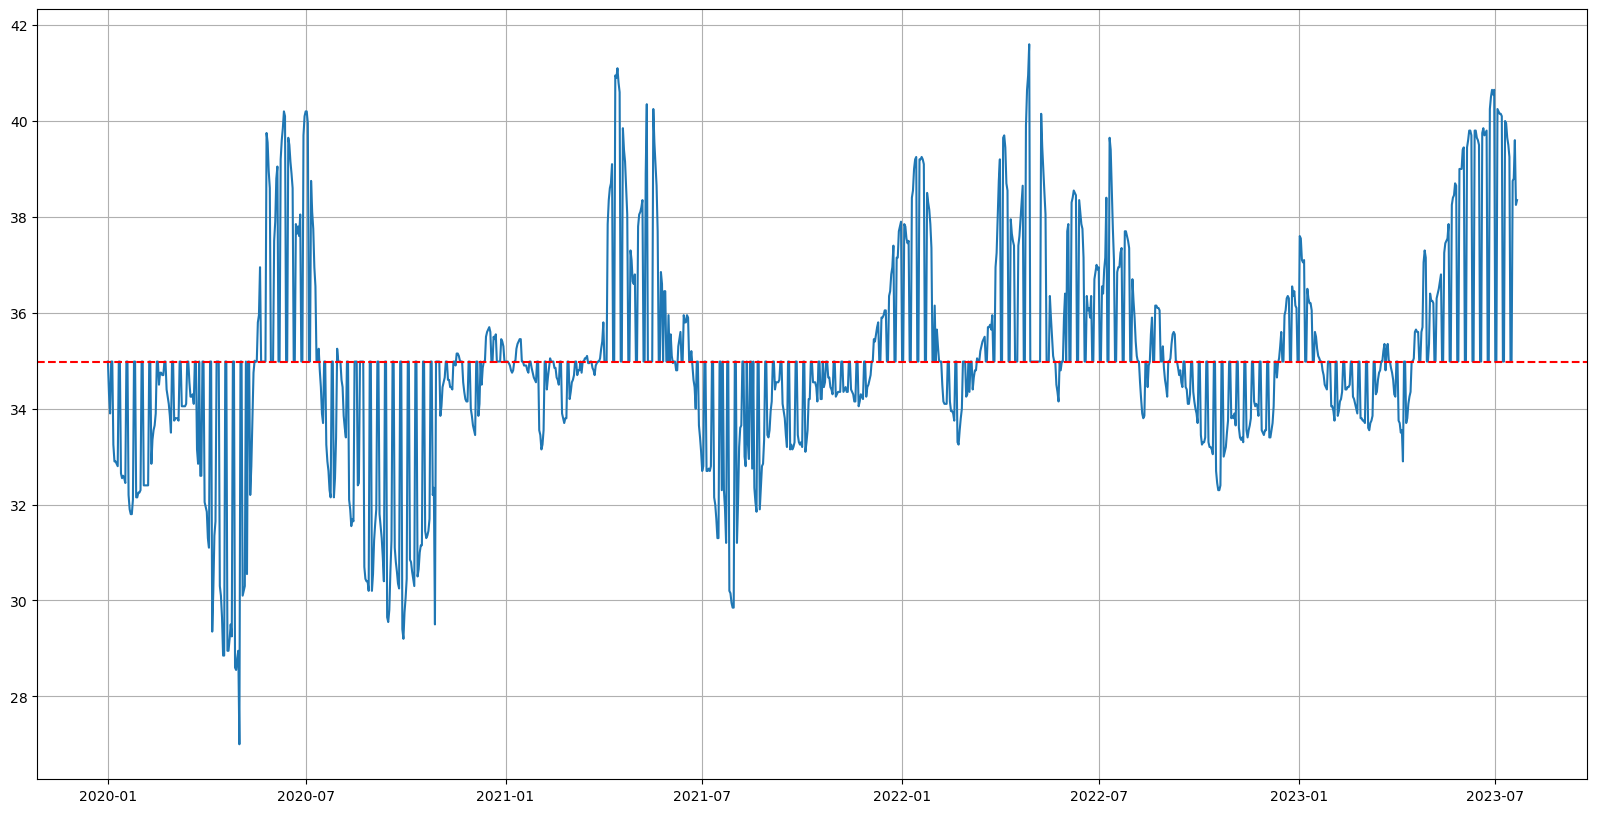

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(sampled_data['index'], sampled_data['Daging Ayam'])
plt.axhline(y=column_mean, color='r', linestyle='--')
ax.grid(True)

In [22]:
sampled_data.isna().sum()

index          0
Daging Ayam    0
dtype: int64